In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def plot_distances(ideal_distances, real_distances):
    fig, ax = plt.subplots(figsize=(6,3))
    
    ax.plot(ideal_distances, label='Ground truth')
    ax.plot(real_distances, label='Estimation')
    
    ax.set_xlabel(r'angle (degrees)', fontsize=11)
    ax.set_ylabel(r'distance (cm)', fontsize=11)
#     ax.legend(frameon=False)
 
    fig.savefig("distances.pdf", bbox_inches='tight')
    
    plt.show()

def scatter_points(ideal_points, real_points):
    fig, ax = plt.subplots(figsize=(4,4))
    
    ax.set_xlim([-30,30])
    ax.set_ylim([-30,30])

    ax.plot(ideal_points[0], ideal_points[1], label='Ground truth')
    ax.plot(real_points[0], real_points[1], label='Estimation')
    
    ax.set_xlabel(r'$x$ (cm)', fontsize=11)
    ax.set_ylabel(r'$y$ (cm)', fontsize=11)
#     ax.legend(frameon=False)
 
    fig.savefig("results_visualisation.pdf", bbox_inches='tight')
    
    plt.show()
    
def visualise_error(ideal_points, real_points):
    fig, ax = plt.subplots(figsize=(6,6))
    
    ax.set_xlim([8,30])
    ax.set_ylim([8,30])
    
    ideal_distances = coords_to_distances(ideal_coords)
    real_distances = coords_to_distances(real_coords)
    
    under_added = False
    over_added = False
    
    for i in range(360):
        if ideal_distances[i] > real_distances[i]:
            ax.plot([0,real_points[0][i]], [0,real_points[1][i]], color='green')
            if not under_added:
                ax.plot([real_points[0][i], ideal_points[0][i]], [real_points[1][i], ideal_points[1][i]], color='magenta', label='Undershot value')
                under_added = True
            else:
                ax.plot([real_points[0][i], ideal_points[0][i]], [real_points[1][i], ideal_points[1][i]], color='magenta')
        else:
            ax.plot([0,ideal_points[0][i]], [0,ideal_points[1][i]], color='green')
            if not over_added:
                ax.plot([ideal_points[0][i], real_points[0][i]], [ideal_points[1][i], real_points[1][i]], color='red', label='Overshot value')
                over_added = True
            else:
                ax.plot([ideal_points[0][i], real_points[0][i]], [ideal_points[1][i], real_points[1][i]], color='red')

    ax.plot(ideal_points[0], ideal_points[1], color='black', label='Ground truth')
    ax.plot(real_points[0], real_points[1], color='blue', label='Estimation')
    
    ax.set_xlabel(r'Distance (cm)', fontsize=11)
    ax.set_ylabel(r'Distance (cm)', fontsize=11)
    ax.legend(frameon=False)
 
    fig.savefig("error_visualisation.pdf", bbox_inches='tight')
    
    plt.show()

In [4]:
def ideal_box_distances(radius):
    # Hypotenuse = radius / cos(theta)
    first_45  = np.full(46, radius) / np.cos(np.radians(np.arange(46)))
    second_45 = np.flip(first_45, axis=0)[1:]
    ninety = np.concatenate((first_45, second_45), axis=None)
    trimmed_ninety = ninety[1:]
    return np.concatenate((ninety, trimmed_ninety, trimmed_ninety, trimmed_ninety[:-1]), axis=None)

In [5]:
def distances_to_coords(distances, center):
    x_coords = center[0] + (distances * np.sin(np.radians(np.arange(360))))
    y_coords = center[1] + (distances * np.cos(np.radians(np.arange(360))))
    return x_coords, y_coords

def coords_to_distances(coords):
    return np.sqrt(coords[0]**2 + coords[1]**2)

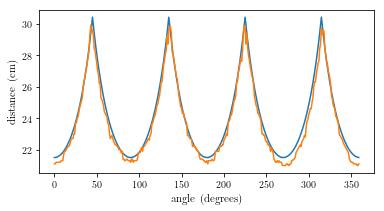

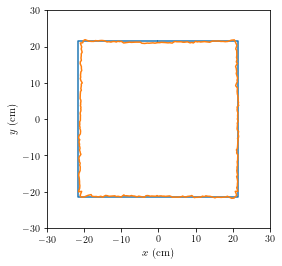

In [6]:
import final_measurements as fm

real_distances = np.array(fm.box_44_one_0)

real_distances = np.roll(real_distances, -1)
real_distances = real_distances/10 + 8.5
real_coords = distances_to_coords(real_distances, (0,0))

ideal_distances = ideal_box_distances(21.5)
ideal_coords = distances_to_coords(ideal_distances, (0,0))

plot_distances(ideal_distances, real_distances)
scatter_points(ideal_coords, real_coords)

In [7]:
def calc_sum_of_abs_diff(ideal_distances, real_distances):
    return np.sum(np.absolute(ideal_distances - real_distances)) / len(ideal_distances)

def calc_sum_of_over_diff(ideal_distances, real_distances):
    return np.sum(np.maximum(real_distances - ideal_distances, 0)) / len(ideal_distances)

def calc_sum_of_under_diff(ideal_distances, real_distances):
    return np.sum(np.minimum(real_distances - ideal_distances, 0)) / len(ideal_distances)

def calc_corner_weighted_sum_of_diff(ideal_distances, real_distances):
    differences = real_distances - np.roll(real_distances, -1)
    return np.sum(np.absolute(ideal_distances - real_distances) * differences * 100) / len(ideal_distances)

In [8]:
print(calc_sum_of_abs_diff(ideal_distances, coords_to_distances(real_coords)))
print(calc_sum_of_over_diff(ideal_distances, coords_to_distances(real_coords)))
print(calc_sum_of_under_diff(ideal_distances, coords_to_distances(real_coords)))
print(calc_corner_weighted_sum_of_diff(ideal_distances, coords_to_distances(real_coords)))

0.3553787821254619
0.01410678053440959
-0.34127200159105237
-2.4629971713947656


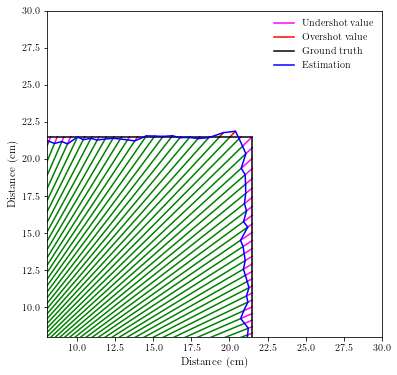

In [9]:
visualise_error(ideal_coords, real_coords)